<a href="https://colab.research.google.com/github/erendagasan/Eren-Dagasan-Personal/blob/main/DAMPFER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
life_time_final = 60 * 60 * 24 * 30 * 12 * 50
time_step = 300
Pinitial = 2000
Pambient = 1000
V = 0.001
Pcritic = 1500
Qinitial_vals = np.arange(1.1E-9, 1E-8, 1e-9)
# Qinitial_vals = np.arange(1.1E-8, 1E-7, 1E-8)
time_actual = np.arange(time_step, life_time_final, time_step)

df_list = []

for Qinitial in Qinitial_vals:
    Premain_start = Pinitial - (Qinitial * time_step / V)
    Q_start = (Qinitial * ((Premain_start**2) - (Pambient**2)) / ((Pinitial**2) - (Pambient**2)))
    Pambient_start = Pambient+Pinitial-Premain_start

    Premain_list = []
    Premain_list.append(Pinitial)
    Premain_list.append(Premain_start)

    Pambient_list = []
    Pambient_list.append(Pambient)
    Pambient_list.append(Pambient_start)

    Q_calc_future_list = []
    Q_calc_future_list.append(Qinitial)
    Q_calc_future_list.append(Q_start)

    Premain_calc_buffer = Premain_start
    Premain_calc_buffer_before = Premain_start
    Pambient_calc_buffer = Pambient_start

    Q_buffer_calc = Q_start

    i = 0
    while Premain_calc_buffer > Pcritic and Pambient_calc_buffer < Pcritic:
        Premain_calc_buffer = Premain_calc_buffer - (Q_buffer_calc * time_step / V)
        Premain_list.append(Premain_calc_buffer)

        Pambient_calc_buffer = Pambient + (Pinitial-Premain_calc_buffer)
        Pambient_list.append(Pambient_calc_buffer)

        calc = Q_buffer_calc * ((Premain_calc_buffer**2) - (Pambient**2)) / ((Premain_calc_buffer_before**2) - (Pambient**2))
        Q_calc_future_list.append(calc)
        Q_buffer_calc = calc

        Premain_calc_buffer_before = Premain_calc_buffer

        i+=1


    Premain_real_list = []
    Premain_real_list.append(Pinitial)
    Premain_real_list.append(Premain_start)

    Pambient_real_list = []
    Pambient_real_list.append(Pambient)
    Pambient_real_list.append(Pambient_start)

    Q_real_future_list = []
    Q_real_future_list.append(Qinitial)
    Q_real_future_list.append(Q_start)

    Premain_real_buffer = Premain_start
    Premain_real_buffer_before = Premain_start
    Pambient_real_buffer = Pambient_start
    Pambient_real_buffer_before = Pambient_start

    Q_buffer_real = Q_start

    i = 0
    while Premain_real_buffer > Pcritic and Pambient_real_buffer < Pcritic:
        Premain_real_buffer = Premain_real_buffer - (Q_buffer_real * time_step / V)
        Premain_real_list.append(Premain_real_buffer)

        Pambient_real_buffer = Pambient + (Pinitial-Premain_real_buffer)
        Pambient_real_list.append(Pambient_real_buffer)

        calc = Q_buffer_real * ((Premain_real_buffer**2) - (Pambient_real_buffer_before**2)) / ((Premain_real_buffer_before**2) - (Pambient_real_buffer_before**2))
        Q_real_future_list.append(calc)
        Q_buffer_real = calc

        Premain_real_buffer_before = Premain_real_buffer
        Pambient_real_buffer_before = Pambient_real_buffer

        i+=1

    Q_diff = np.array(Q_real_future_list)-np.array(Q_calc_future_list)

    df = pd.DataFrame({'Qcalc': Q_calc_future_list, 'Qreal': Q_real_future_list, 'Qdiff': Q_diff, 'Pinternal': Premain_list, 'Penv': Pambient_list, 'Duration': time_actual[:len(Premain_list)]})

    #Converting duration in seconds to specified time variables
    df['Duration_min']   = df['Duration']/60
    df['Duration_hour']  = df['Duration_min']/60
    df['Duration_day']   = df['Duration_hour']/24
    df['Duration_month'] = df['Duration_day']/30
    df['Duration_year']  = df['Duration_month']/12

    #Adding all the df's that depends different Qinitial values to a list
    df_list.append(df)

In [55]:
pd.options.display.float_format = '{:.2e}'.format

In [58]:
data_real = {
    "Qreal": Q_real_future_list,
    "Penv_real": Pambient_real_list,
    "Pint_real": Premain_real_list,
    "Duration": time_actual[:len(Premain_real_list)]
}

data_real = pd.DataFrame(data_real)

data_real['Duration_min']   = data_real['Duration']/60
data_real['Duration_hour']  = data_real['Duration_min']/60
data_real['Duration_day']   = data_real['Duration_hour']/24
data_real['Duration_month'] = data_real['Duration_day']/30
data_real['Duration_year']  = data_real['Duration_month']/12

data_real.head(10)

,Qreal,Penv_real,Pint_real,Duration,Duration_min,Duration_hour,Duration_day,Duration_month,Duration_year
0,1.100000000000e-09,1.000000000000e+03,2.000000000000e+03,300,5.000000000000e+00,8.333333333333e-02,3.472222222222e-03,1.157407407407e-04,9.645061728395e-06
1,1.099999516000e-09,1.000000330000e+03,1.999999670000e+03,600,1.000000000000e+01,1.666666666667e-01,6.944444444444e-03,2.314814814815e-04,1.929012345679e-05
2,1.099999032000e-09,1.000000660000e+03,1.999999340000e+03,900,1.500000000000e+01,2.500000000000e-01,1.041666666667e-02,3.472222222222e-04,2.893518518519e-05
3,1.099998548001e-09,1.000000990000e+03,1.999999010000e+03,1200,2.000000000000e+01,3.333333333333e-01,1.388888888889e-02,4.629629629630e-04,3.858024691358e-05
4,1.099998064001e-09,1.000001319999e+03,1.999998680001e+03,1500,2.500000000000e+01,4.166666666667e-01,1.736111111111e-02,5.787037037037e-04,4.822530864198e-05
5,1.099997580002e-09,1.000001649999e+03,1.999998350001e+03,1800,3.000000000000e+01,5.000000000000e-01,2.083333333333e-02,6.944444444444e-04,5.787037037037e-05
6,1.099997096003e-09,1.000001979998e+03,1.999998020002e+03,2100,3.500000000000e+01,5.833333333333e-01,2.430555555556e-02,8.101851851852e-04,6.751543209877e-05
7,1.099996612004e-09,1.000002309997e+03,1.999997690003e+03,2400,4.000000000000e+01,6.666666666667e-01,2.777777777778e-02,9.259259259259e-04,7.716049382716e-05
8,1.099996128006e-09,1.000002639996e+03,1.999997360004e+03,2700,4.500000000000e+01,7.500000000000e-01,3.125000000000e-02,1.041666666667e-03,8.680555555556e-05
9,1.099995644007e-09,1.000002969995e+03,1.999997030005e+03,3000,5.000000000000e+01,8.333333333333e-01,3.472222222222e-02,1.157407407407e-03,9.645061728395e-05


In [57]:
data_calc = {
    "Qcalc": Q_calc_future_list,
    "Penv_calc": Pambient_list,
    "Pint_calc": Premain_list,
    "Duration": time_actual[:len(Premain_list)]
}

data_calc['Duration_min']   = data_calc['Duration']/60
data_calc['Duration_hour']  = data_calc['Duration_min']/60
data_calc['Duration_day']   = data_calc['Duration_hour']/24
data_calc['Duration_month'] = data_calc['Duration_day']/30
data_calc['Duration_year']  = data_calc['Duration_month']/12

data_calc = pd.DataFrame(data_calc)
data_calc.head(10)

,Qcalc,Penv_calc,Pint_calc,Duration,Duration_min,Duration_hour,Duration_day,Duration_month,Duration_year
0,1.100000000000e-09,1.000000000000e+03,2.000000000000e+03,300,5.000000000000e+00,8.333333333333e-02,3.472222222222e-03,1.157407407407e-04,9.645061728395e-06
1,1.099999516000e-09,1.000000330000e+03,1.999999670000e+03,600,1.000000000000e+01,1.666666666667e-01,6.944444444444e-03,2.314814814815e-04,1.929012345679e-05
2,1.099999032000e-09,1.000000660000e+03,1.999999340000e+03,900,1.500000000000e+01,2.500000000000e-01,1.041666666667e-02,3.472222222222e-04,2.893518518519e-05
3,1.099998548001e-09,1.000000990000e+03,1.999999010000e+03,1200,2.000000000000e+01,3.333333333333e-01,1.388888888889e-02,4.629629629630e-04,3.858024691358e-05
4,1.099998064002e-09,1.000001319999e+03,1.999998680001e+03,1500,2.500000000000e+01,4.166666666667e-01,1.736111111111e-02,5.787037037037e-04,4.822530864198e-05
5,1.099997580003e-09,1.000001649999e+03,1.999998350001e+03,1800,3.000000000000e+01,5.000000000000e-01,2.083333333333e-02,6.944444444444e-04,5.787037037037e-05
6,1.099997096005e-09,1.000001979998e+03,1.999998020002e+03,2100,3.500000000000e+01,5.833333333333e-01,2.430555555556e-02,8.101851851852e-04,6.751543209877e-05
7,1.099996612006e-09,1.000002309997e+03,1.999997690003e+03,2400,4.000000000000e+01,6.666666666667e-01,2.777777777778e-02,9.259259259259e-04,7.716049382716e-05
8,1.099996128009e-09,1.000002639996e+03,1.999997360004e+03,2700,4.500000000000e+01,7.500000000000e-01,3.125000000000e-02,1.041666666667e-03,8.680555555556e-05
9,1.099995644011e-09,1.000002969995e+03,1.999997030005e+03,3000,5.000000000000e+01,8.333333333333e-01,3.472222222222e-02,1.157407407407e-03,9.645061728395e-05


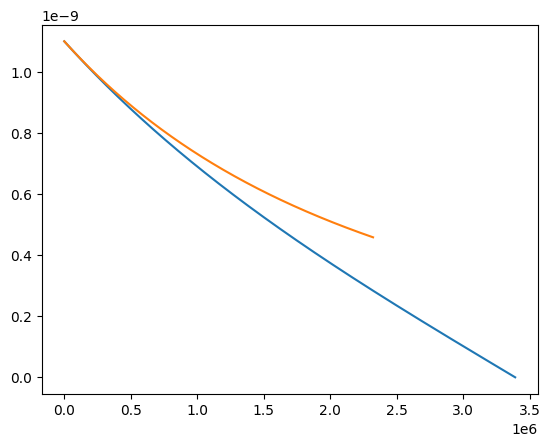

In [48]:
plt.plot(range(len(data_real.index)), data_real["Qreal"])
plt.plot(range(len(data_calc.index)), data_calc["Qcalc"])
plt.show()